In [2]:
# %pip install pandas
# %pip install numpy
# %pip install matplotlib
# %pip install seaborn
# %pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [4]:
# Data processing
import pandas as pd
import numpy as np
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Dataset
from sklearn import datasets
# Dimensionality reduction
from sklearn.decomposition import PCA
# Modeling
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN

dataset = pd.read_csv("data/tracks_with_genres_&_language.csv")
df = pd.DataFrame(dataset)
df.info()
df_features = df[['energy', 'valence', 'acousticness']]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186011 entries, 0 to 186010
Data columns (total 28 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                186011 non-null  object 
 1   name              186011 non-null  object 
 2   popularity        186011 non-null  int64  
 3   duration_ms       186011 non-null  int64  
 4   explicit          186011 non-null  int64  
 5   id_artists        186011 non-null  object 
 6   release_date      186011 non-null  object 
 7   danceability      186011 non-null  float64
 8   energy            186011 non-null  float64
 9   key               186011 non-null  int64  
 10  loudness          186011 non-null  float64
 11  mode              186011 non-null  int64  
 12  speechiness       186011 non-null  float64
 13  acousticness      186011 non-null  float64
 14  instrumentalness  186011 non-null  float64
 15  liveness          186011 non-null  float64
 16  valence           18

In [14]:
df['acousticness'].value_counts()

acousticness
0.102410    312
0.111446    297
0.110442    295
0.112450    295
0.103414    294
           ... 
0.000065      1
0.000007      1
0.000002      1
0.000004      1
0.000005      1
Name: count, Length: 4975, dtype: int64

In [5]:
df['valence'].value_counts()

valence
0.96100    678
0.96200    568
0.96300    513
0.96400    455
0.96000    445
          ... 
0.00237      1
0.00867      1
0.01660      1
0.00850      1
0.04090      1
Name: count, Length: 1758, dtype: int64

In [6]:
df['energy'].value_counts()

energy
0.803000    372
0.726000    371
0.725000    369
0.720000    367
0.855000    366
           ... 
0.000261      1
0.026300      1
0.003380      1
0.014700      1
0.006210      1
Name: count, Length: 2031, dtype: int64

# K Means Clustering

In [2]:
# Kmeans model
kmeans = KMeans(n_clusters = 3,  random_state = 20, n_init = 20)
# Fit and predict on the data
y_kmeans = kmeans.fit_predict(df_features)
#Save centroids
centroids = kmeans.cluster_centers_
# Save the predictions as a column
df['y_kmeans']=y_kmeans
# Check the distribution
df['y_kmeans'].value_counts()

y_kmeans
2    74911
1    63004
0    48096
Name: count, dtype: int64

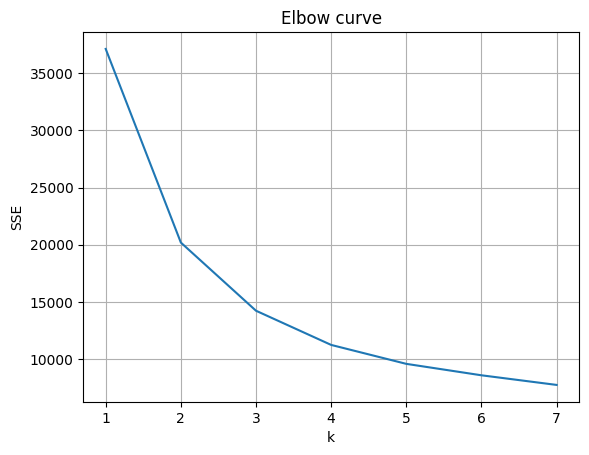

In [3]:
SSE = []
for i in range(1,8):
    model_i = KMeans(n_clusters = i, max_iter=300, tol=0.0001, n_init=20, random_state=99)
    model_i.fit(df_features)
    SSE.append(model_i.inertia_)

# Plot the elbow curve
k = (range(1,8))
plt.plot(k, SSE)

# Add more information to plot.
plt.title('Elbow curve')
plt.xlabel('k')
plt.ylabel('SSE')
plt.grid(True)
plt.show()

## visualising clusters

#### using PCA

In [4]:
# PCA with 2 components
pca=PCA(n_components=2).fit_transform(df_features)
# Create columns for the 2 PCA components
df['PCA1'] = pca[:, 0]
df['PCA2'] = pca[:, 1]

# Transform the centroids using the same PCA transformation
centroids_pca = PCA(n_components=2).fit_transform(centroids)

# Take a look at the data
df.head()

id                                               name  \
0  6catF1lDhNTjjGa2GxRQNN      You'll Never Walk Alone - Mono; 2002 Remaster   
1  6Pkt6qVikqPBt9bEQy8iTz                                 A Lover's Concerto   
2  4aSw1QJIMwYSoDEgzgdCJL       Ferry Cross the Mersey - Mono; 2002 Remaster   
3  0ZMMtH875IR2TfkyC4PolD   Don't Let the Sun Catch You Crying (Main) - Mono   
4  1hx7X9cMXHWJjknb9O6Ava  The September Of My Years - Live At The Sands ...   

   popularity  duration_ms  explicit                  id_artists release_date  \
0          56       160187         0  ['3UmBeGyNwr4iDWi1vTxWi8']   2008-02-11   
1          41       159560         0  ['6lH5PpuiMa5SpfjoIOlwCS']   2020-03-13   
2          40       141987         0  ['3UmBeGyNwr4iDWi1vTxWi8']   2008-02-11   
3          34       157093         0  ['3UmBeGyNwr4iDWi1vTxWi8']   2008-02-11   
4          26       187333         0  ['1Mxqyy3pSjf8kZZL4QVxS0']   2018-05-04   

   danceability  energy  key  ...  artists_count                artist_1  \
0         0.484   0.265    0  ...              1  Gerry & The Pacemakers   
1         0.671   0.867    2  ...              1                The Toys   
2         0.405   0.365    6  ...              1  Gerry & The Pacemakers   
3         0.477   0.352    1  ...              1  Gerry & The Pacemakers   
4         0.319   0.201    7  ...              1           Frank Sinatra   

   artist_2  artist_3  artist_4  \
0       NaN       NaN       NaN   
1       NaN       NaN       NaN   
2       NaN       NaN       NaN   
3       NaN       NaN       NaN   
4       NaN       NaN       NaN   

                                              genres  language  y_kmeans  \
0  ['adult standards', 'bubblegum pop', 'merseybe...        en         0   
1                                                 []        en         2   
2  ['adult standards', 'bubblegum pop', 'merseybe...        en         2   
3  ['adult standards', 'bubblegum pop', 'merseybe...        en         0   
4    ['easy listening', 'adult standards', 'lounge']        en         0   

       PCA1      PCA2  
0  0.364691 -0.189125  
1 -0.119155  0.336489  
2  0.099099  0.029499  
3  0.260194 -0.007963  
4  0.793771 -0.026722  

[5 rows x 31 columns]

In [5]:
#colour
palette = sns.color_palette("husl", 3)
# Visualization using PCA
fig, axs = plt.subplots(ncols=2, sharey=True, figsize=(20, 12))

# Scatter plot for ground truth
sns.scatterplot(x='PCA1', y='PCA2', data=df, hue='energy', palette=palette, ax=axs[0]).set(title='Ground Truth')

# Scatter plot for KMeans
sns.scatterplot(x='PCA1', y='PCA2', data=df, hue='y_kmeans', palette=palette, ax=axs[1]).set(title='KMeans')

# Scatter plot for centroids
sns.scatterplot(x=centroids_pca[:, 0], y=centroids_pca[:, 1], hue=[1, 2, 0], palette=palette, marker='X', s=200, ax=axs[1])


C:\Users\aanny\AppData\Local\Temp\ipykernel_32260\3253077289.py:7: UserWarning: 
The palette list has fewer values (3) than needed (2031) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x='PCA1', y='PCA2', data=df, hue='energy', palette=palette, ax=axs[0]).set(title='Ground Truth')


<Axes: title={'center': 'KMeans'}, xlabel='PCA1', ylabel='PCA2'>

C:\Users\aanny\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\aanny\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


#### using topographic map

In [33]:
# Create a jointplot, which is like a topographic map that shows height on a 2-D map.
# The x and y axes are 'time' and 'sections' respectively,
# and the height of the map represents the frequency.
sns.jointplot(x='valence', y='energy', z='acousticness', data=df, kind="kde",height=7, space=0)

#### using heatmap

In [ ]:
# Show heatmap of clusters.
# "clust_means.T" means that we will transpose the 'clust_means' DataFrame,
# so that the rows become columns, and the columns become rows.
# Each column is a cluster centroid,
# each row is a variable in the dataset,
# and the average value is represented as a color
sns.heatmap(df.T,  linewidths=.5, cmap="YlGnBu")
# .T means transpose -> row will become column and column will become row

# DBSCAN

In [5]:
# Fit the DBSCAN model
#epsilon: radius of the circle to be created around each data point to check the density
#minPoints: minimum number of data points required inside that circle for that data point to be classified as a Core point
dbscan = DBSCAN(eps=0.8, min_samples=5000)
# Fit and predict on the data
y_dbscan = dbscan.fit_predict(df_features)
# Save the prediction as a column
df['y_dbscan'] = y_dbscan
# Check the distribution
df['y_dbscan'].value_counts()

MemoryError: 